In [2]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import time
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
dirdata1='forehand_train_img/'
dirdata2='backhand_train_img/'

In [4]:
def data_img(dirdata1,dirdata2):
    data = [] # 1 step
    label = []
    height=120
    BLACK = [0,0,0]
    for i in os.listdir(dirdata1): # 2 step
        img = cv2.imread(dirdata1+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(0) # 2-3
    for i in os.listdir(dirdata2):
        img = cv2.imread(dirdata2+i)
        x,y,z = img.shape
        if x<=height:
            constant = cv2.copyMakeBorder(img,0,height-x,0,0,cv2.BORDER_CONSTANT,value=BLACK)
        data.append(constant) # 2-2 
        label.append(1) # 2-3
        
    data = np.array(data) # 3
    label = np.array(label) #3

    label_one_hot = np.eye(2)[label] # 4 one-hot encoding

    data_norm = data / 255 #5
    return data_norm,label_one_hot

In [5]:
data, label=data_img(dirdata1,dirdata2)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.5, random_state=42)

In [7]:
from keras.applications import vgg16

In [16]:
#讀取vgg16模型並重設輸入層
vgg16=vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(120,50,3))

In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 50, 3)]      0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0     

In [23]:
#建立新的模型
model = Sequential()

In [24]:
#將vgg16的訓練層讀進新模型
for layer in vgg16.layers:
    model.add(layer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 30, 12, 256)      

In [25]:
#將vgg16的訓練層參數凍結
for layer in model.layers:
    layer.trainable = False

In [26]:
#在新模型後加入新的輸出
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 120, 50, 64)       1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 50, 64)       36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 30, 12, 256)      

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

start_time = time.time()
# 開始訓練  
train_history = model.fit(X_train,Y_train,validation_split=0.2,epochs=100, batch_size=30, verbose=1)
end_time = time.time()

Epoch 1/100
6/6 [==============================] - 6s 267ms/step - loss: 0.8170 - accuracy: 0.5284 - val_loss: 0.6635 - val_accuracy: 0.5455
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.5665 - accuracy: 0.6818 - val_loss: 0.6265 - val_accuracy: 0.5000
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 0.5324 - accuracy: 0.7102 - val_loss: 0.3957 - val_accuracy: 0.7955
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4490 - accuracy: 0.7841 - val_loss: 0.2707 - val_accuracy: 0.9545
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4119 - accuracy: 0.8239 - val_loss: 0.2182 - val_accuracy: 0.9545
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3458 - accuracy: 0.8466 - val_loss: 0.1921 - val_accuracy: 0.9773
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3050 - accuracy: 0.8864 - val_loss: 0.1746 - val_accuracy: 0.9545
Epoch 8/100
6/6 [==

In [29]:
execution_time = (end_time - start_time)
print("執行時間: ",execution_time,"s")

執行時間:  16.917825937271118 s


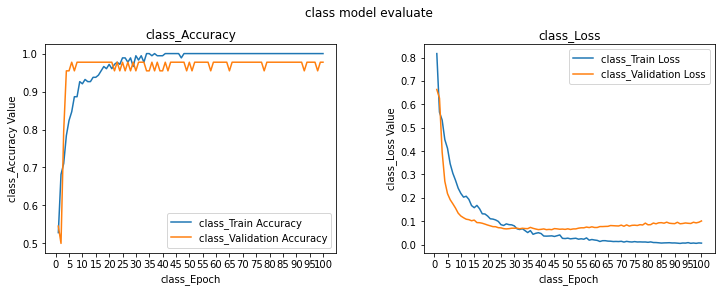

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('class model evaluate', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

class_epoch_list = list(range(1,101))
ax1.plot(class_epoch_list, train_history.history['accuracy'], label='class_Train Accuracy')
ax1.plot(class_epoch_list, train_history.history['val_accuracy'], label='class_Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('class_Accuracy Value')
ax1.set_xlabel('class_Epoch')
ax1.set_title('class_Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(class_epoch_list, train_history.history['loss'], label='class_Train Loss')
ax2.plot(class_epoch_list, train_history.history['val_loss'], label='class_Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('class_Loss Value')
ax2.set_xlabel('class_Epoch')
ax2.set_title('class_Loss')
l2 = ax2.legend(loc="best")

In [31]:
#model.save('2d_cnn_transfer_vgg16.h5')

In [32]:
modello = keras.models.load_model('2d_cnn_transfer_vgg16.h5')

In [33]:
test_dirdata1='forehand_test_img/'
test_dirdata2='backhand_test_img/'

In [34]:
test_data, test_label=data_img(test_dirdata1,test_dirdata2)

In [35]:
time_pre=modello.predict(test_data,verbose=2)

9/9 - 1s - 1s/epoch - 130ms/step


In [36]:
Y_test = np.argmax(test_label,axis=1)
Y_pred = np.argmax(time_pre,axis=1)

              precision    recall  f1-score   support

    forehand       0.96      0.91      0.94       115
    backhand       0.93      0.97      0.95       145

    accuracy                           0.95       260
   macro avg       0.95      0.94      0.95       260
weighted avg       0.95      0.95      0.95       260



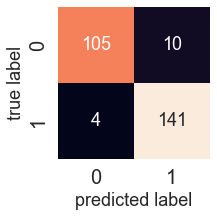

In [37]:
mat = confusion_matrix(Y_test,Y_pred)

sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('true label')
plt.xlabel('predicted label');

target_names = ["forehand","backhand"]
print(classification_report(Y_test,Y_pred,target_names=target_names))